# Datasets

Box Office Mojo:
- bom.movie_gross.csv.gz

IMDB (more infor info [here](https://www.imdb.com/interfaces/)):
- imdb.name.basics.csv.gz
- imdb.title.akas.csv.gz
- imdb.title.basics.csv.gz
- imdb.title.crew.csv.gz
- imdb.title.principals.csv.gz
- imdb.title.ratings.csv.gz

Rotten Tomatoes:
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz

TheMovieDB:
- tmdb.movies.csv.gz

The Numbers:
- tn.movie_budgets.csv.gz

# Genres Data Exploration

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500) # Allows Jupyter Notebook to expand how much data is shown.

## Reading in IMDB's title.basics dataset

In [2]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
g_df = imdb_title_basics_df #g stands for genre(s)
g_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Identifying Duplicates in IMDB's title.basics

Now I want to see how many duplicates are in the `'primary_title'` column.

I probably want to see duplicates more often later, so I might as well define a function.

In [3]:
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in list(range(len(series_vcs))) if series_vcs.values[index] > 1]
    print("Amount of unique duplicate movie title: " + str(len(series_dupes)))
    print("Total amount of duplicate movie titles: " + str(series_vcs[0:len(series_dupes)].sum()))
    
    return series_vcs

determine_dupes(g_df['primary_title'])

Amount of unique duplicate movie title: 6182
Total amount of duplicate movie titles: 16255


Home                                       24
Broken                                     20
The Return                                 20
Alone                                      16
Homecoming                                 16
                                           ..
Kim Jong Un: The Unauthorized Biography     1
The Sign                                    1
Go in the Wilderness                        1
Manoharam                                   1
Golden Dawn, NYC                            1
Name: primary_title, Length: 136071, dtype: int64

## Creating `'title_dupes_df'` DataFrame to include new movie titles with movie name and movie year for duplicates

To do this, I need to create a new DataFrame called `title_dupes_df`.

But I first need to create a unique ID column within `g_df` so that I can easily merge `title_dupes_df` later.

In [4]:
g_df.reset_index(inplace=True)
g_df.rename(columns={'index' : 'unique_id'}, inplace=True)
g_df

,unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


I now need to create a dataframe of all the duplicate movie titles, and then create a new column called `'updated_title'` that includes the name of the movie and the year of the movie.

In [5]:
title_vcs = pd.Series(g_df['primary_title'].value_counts())
title_dupes = [title_vcs.index[index] for index in list(range(len(title_vcs))) if title_vcs.values[index] > 1]
title_dupes_df = g_df[g_df['primary_title'].isin(title_dupes)].copy()
title_dupes_df

,unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery"
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama"
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama"
...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


In [6]:
title_dupes_df['updated_title'] = title_dupes_df['primary_title'] + ' ' + title_dupes_df['start_year'].astype(str)
title_dupes_df

,unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
19,19,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",Los pájaros se van con la muerte 2011
21,21,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",Godfather 2012
30,30,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,Life's a Beach 2012
34,34,tt0297400,Snowblind,Snowblind,2015,NaN,"Crime,Drama",Snowblind 2015
...,...,...,...,...,...,...,...,...
146119,146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",Bacchanalia 2017
146120,146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama",Paradise 2019
146125,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,Albatross 2017
146134,146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,Drømmeland 2019


I want to see how many unique duplicates there are in `title_dupes_df` and compare it to how many unique duplicates there were in `g_df`.

Over 66% of the records that once weren't unique are now unique!

In [7]:
determine_dupes(title_dupes_df['updated_title'])

Amount of unique duplicate movie title: 1870
Total amount of duplicate movie titles: 3942


Ângelo de Sousa - Tudo o Que Sou Capaz 2010    7
Split 2016                                     6
Inside Out 2011                                5
Maya 2015                                      4
A Christmas Carol 2018                         4
                                              ..
Beyond Belief 2011                             1
Player 2011                                    1
Amin 2010                                      1
The Meeting 2011                               1
Adolescence 2017                               1
Name: updated_title, Length: 14183, dtype: int64

Now lets remove the columns that we don't want to duplicate during the merge.

In [8]:
remove_columns = ['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
title_dupes_df.drop(columns=remove_columns, axis=1, inplace=True)
title_dupes_df

,unique_id,updated_title
6,6,Bigfoot 2017
19,19,Los pájaros se van con la muerte 2011
21,21,Godfather 2012
30,30,Life's a Beach 2012
34,34,Snowblind 2015
...,...,...
146119,146119,Bacchanalia 2017
146120,146120,Paradise 2019
146125,146125,Albatross 2017
146134,146134,Drømmeland 2019


## Merging `'title_dupes_df1'` with `'g_df'`

I now need too merge `title_dupes_df` into `g_df`.

In [9]:
g_and_dupes_df = pd.merge(left=g_df, right=title_dupes_df, on=['unique_id'], how ='left')
g_and_dupes_df.head(25)

,unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN


Now I need to assign non-null values in the `'updated_title'` column to their respective `'primary_title`'. I found it easiest to create a new column that tells me whether or not a non-null value is in the `'updated_title'` column.

In [10]:
# This code block may take up to 20 seconds to run.

g_and_dupes_df['is_title_NaN'] = g_and_dupes_df['updated_title'].isnull()
g_and_dupes_df.head(25)
for movie_index in list(range(len(g_df.index))):
    if ~g_and_dupes_df['is_title_NaN'][movie_index]:
        g_and_dupes_df['primary_title'][movie_index] = g_and_dupes_df['updated_title'][movie_index]
g_and_dupes_df.head(25)

<ipython-input-10-f0a35cfeeb82>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_and_dupes_df['primary_title'][movie_index] = g_and_dupes_df['updated_title'][movie_index]


,unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres,updated_title,is_title_NaN
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,True
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,True
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,True
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,True
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,True
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,True
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller",Bigfoot 2017,False
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",NaN,True
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,True
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,True


Now lets remove the columns that we don't need for further data exploration.

In [11]:
remove_columns = ['updated_title', 'is_title_NaN']
g_and_dupes_df.drop(columns=remove_columns, axis=1, inplace=True)

In [12]:
g_df = g_and_dupes_df
display(g_df.head(25))
g_df.info()

,unique_id,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   unique_id        146144 non-null  int64  
 1   tconst           146144 non-null  object 
 2   primary_title    146144 non-null  object 
 3   original_title   146123 non-null  object 
 4   start_year       146144 non-null  int64  
 5   runtime_minutes  114405 non-null  float64
 6   genres           140736 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 13.9+ MB


# Merging Julian's Exploratory Data

Attempting to merge Julian's data with my own...

## Reading in TheNumber's movie_budgets dataset

In [13]:
# Credit to Julian
tn_movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
mm_df = tn_movie_budgets_df #mm stands for money_metrics
display(mm_df)
mm_df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Converting columns with \$'s (`str`) to `int` 

In [14]:
# Credit to Julian
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    
    return df

mm_df = clean_a_money_column(mm_df,'worldwide_gross')
mm_df = clean_a_money_column(mm_df,'domestic_gross')
mm_df = clean_a_money_column(mm_df,'production_budget')
display(mm_df)
mm_df.info() # Notice that the dtype for columns 3 thru 5 are now int64 instead of object

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


## Profit Margin & Return on Investment

Profit Margin (PM): $(Revenue-Cost)/Revenue$

Return on Investment (ROI): $Revenue/Cost$

In [15]:
# Credit to Julian
numerator = mm_df['worldwide_gross'] - mm_df['production_budget']
mm_df['Profit Margin'] = numerator/mm_df['worldwide_gross']*100
mm_df['ROI'] = mm_df['worldwide_gross']/mm_df['production_budget']
# mm_df.sort_values(['Profit Margin'], ascending=False, inplace=True) # Sort by largest Profit Margin
mm_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-inf,0.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-inf,0.000000


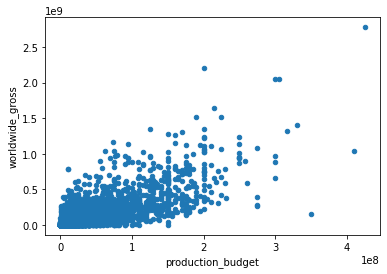

In [16]:
# Credit to Julian
# Scatter plot of worldwide gross revenue vs. production budget cost:
mm_df.plot('production_budget', 'worldwide_gross', kind='scatter');

## Adding `'Year'` column

In [17]:
# Credit to Julian
mm_df['Year'] = pd.to_numeric(mm_df['release_date'].map(lambda x: x[-4:]))
mm_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit Margin,ROI,Year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,84.692106,6.532577,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,60.733080,2.546673,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-133.703598,0.427892,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,76.436443,4.243841,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,75.925058,4.153696,2017
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-inf,0.000000,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,97.505146,40.082500,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-273.692078,0.267600,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-inf,0.000000,2015


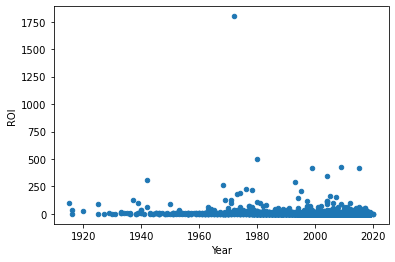

In [18]:
# Credit to Julian
# Scatter plot of ROI vs. Year of Movie Release:
mm_df.plot('Year', 'ROI', kind='scatter');

## Identifying Duplicates in TheNumbers' movie_budgets

In [19]:
determine_dupes(mm_df['movie'])

Amount of unique duplicate movie title: 81
Total amount of duplicate movie titles: 165


Home                           3
Halloween                      3
King Kong                      3
The Texas Chainsaw Massacre    2
The Gambler                    2
                              ..
Kangaroo Jack                  1
A Street Cat Named Bob         1
To Be Frank, Sinatra at 100    1
Conan the Destroyer            1
Glory                          1
Name: movie, Length: 5698, dtype: int64

## Merging The Numbers' movie_budgets with IMDB's title.basics

In order to perform a merge later on, I need to rename the movie title column, `'primary_title'`, within IMDB's title.basics.

In [20]:
g_df.rename(columns={'primary_title' : 'movie'}, inplace=True)
# display(g_df)

Left join g_df into mm_df:

In [ ]:
mm_and_g_df = pd.merge(left=mm_df, right=g_df, on='movie', how ='left')
# display(mm_and_g_df)

I need to create a unique ID column in the newly merged DataFrame.

In [ ]:
mm_and_g_df.reset_index(inplace=True)
mm_and_g_df.rename(columns={'index' : 'unique_id'}, inplace=True)
mm_and_g_df

## Data Cleaning...

In [ ]:
determine_dupes(mm_and_g_df['movie'])

In [ ]:
def generate_uid_removal_list(test_df, keep_uid_list):
    test_df = test_df.drop_duplicates(subset=['unique_id'])
    for uid in keep_uid_list:
        test_df = test_df[test_df['unique_id'] != uid]

    return test_df['unique_id'].tolist()

def remove_uid_from_df(df, uid_removal_list):
    for uid in uid_removal_list:
        df = df[df['unique_id'] != uid]
    
    return df

In [ ]:
# # Home
# test_df = mm_and_g_df[mm_and_g_df['movie'] == 'Home']
# # display(test_df)
# keep_uid_list = [277]
# uid_removal_list = generate_uid_removal_list(test_df, keep_uid_list)
# uid_removal_list
# mm_and_g_df = remove_uid_from_df(mm_and_g_df, uid_removal_list)
# display(mm_and_g_df)
# test_df = mm_and_g_df[mm_and_g_df['movie'] == 'Home']
# # display(test_df)

`test_df = mm_and_g_df_left[mm_and_g_df_left['movie'] == 'Home']`

Legend: mm_df --> g_df

KEEP Mar 27, 2015 Home --> KEEP tt2224026

REMOVE Jun 5, 2009 Home --> N/A (tt1014762 not in title.basics)

REMOVE Apr 23, 2009 Home --> N/A (tt0822388 not in title.basics)

REMOVE ALL OTHER 'Home' MOVIES FROM g_df

## What to do with NaN Values in `'genres'` column??

How many rows in the `'genres'` column have `NaN` values?

In [21]:
g_null_values = g_df['genres'].isna().sum()
print(f'Rows with Null Values in Genres Column: {g_null_values}')
NaN_in_g = g_df[g_df['genres'].isnull()]
NaN_in_g
# NaN_in_genres.to_csv(r'C:\Users\avbro\Documents\Flatiron\1-phase1\projects\New-Film-Studio-at-Microsoft\null_genres.csv')

Rows with Null Values in Genres Column: 5408


,unique_id,tconst,movie,original_title,start_year,runtime_minutes,genres
16,16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,NaN
22,22,tt0253093,Gangavataran,Gangavataran,2018,134.0,NaN
35,35,tt0306058,Second Coming 2012,Second Coming,2012,95.0,NaN
40,40,tt0326592,The Overnight 2010,The Overnight,2010,88.0,NaN
44,44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,NaN
...,...,...,...,...,...,...,...
146088,146088,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,NaN
146089,146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,NaN
146107,146107,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,NaN
146129,146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN


These `NaN` values could in theory be given genres if time permitted.
But for the sake of time, all rows with `NaN`values in the `'genres'` column will be removed.

In [22]:
g_df.dropna(axis=0, subset=['genres'], inplace=True)
g_df

,unique_id,tconst,movie,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146138,146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


Notice index 16 was removed.

In [23]:
g_df.head(20)

,unique_id,tconst,movie,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"Horror,Thriller"
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


## Converting dtype of `'genres'` from `'string'` to `'list'`

The dtype for the `'genres'` column is currently a `string`, and I need to split up the different genres per title into a `list` of genres.

In [24]:
g_df['genres'] = g_df['genres'].map(lambda x: x.split(','))

I would like to see how many different genres can be associated with a single movie,
so I can make usful functions. I first want to know how many genres are associated
with each movie, so I want to make a new column called `'genres_len'`.

In [25]:
g_df['genres_len'] = g_df['genres'].map(lambda x: len(x))

In [26]:
max_genres_for_single_title = g_df['genres_len'].max()
print(f'Maximum Amount of Genres for a Single Title: {max_genres_for_single_title}')

Maximum Amount of Genres for a Single Title: 3


In [27]:
g_df

,unique_id,tconst,movie,original_title,start_year,runtime_minutes,genres,genres_len
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",3
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",2
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],1
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",2
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",3
...,...,...,...,...,...,...,...,...
146138,146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"[Adventure, History, War]",3
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],1
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary],1
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[Comedy],1


## Functions for genre data

Useful functions that will come in handy for data manipulation pertaining to genres...

In [28]:
def unique_g(g_series):
    unique_g_set = set()
    unique_g_list = []
    unique_g_dict = {}
    
    unique_g_set = set([g for g_list in g_series for g in g_list])
    unique_g_list = sorted(list(unique_g_set))
    unique_g_dict = {k: v for k, v in enumerate(unique_g_list)}
        
    return(unique_g_dict)


unique_g_dict = unique_g(g_df['genres'])
unique_g_dict

{0: 'Action',
 1: 'Adult',
 2: 'Adventure',
 3: 'Animation',
 4: 'Biography',
 5: 'Comedy',
 6: 'Crime',
 7: 'Documentary',
 8: 'Drama',
 9: 'Family',
 10: 'Fantasy',
 11: 'Game-Show',
 12: 'History',
 13: 'Horror',
 14: 'Music',
 15: 'Musical',
 16: 'Mystery',
 17: 'News',
 18: 'Reality-TV',
 19: 'Romance',
 20: 'Sci-Fi',
 21: 'Short',
 22: 'Sport',
 23: 'Talk-Show',
 24: 'Thriller',
 25: 'War',
 26: 'Western'}

In [29]:
def select_g_types(unique_g_dict, int_list):
    g_types_list = []
    
    g_types_list = [unique_g_dict[index] for index in int_list]
    
    return g_types_list


g_types = select_g_types(unique_g_dict, [0, 13, 16, 19])
print(g_types)

['Action', 'Horror', 'Mystery', 'Romance']


The entire code block below was for testing purposes only.

In [30]:
# # test_genres_df = genres_df
# # I HIGHLY RECOMMEND NOT PERFORMING THE FOR LOOP ON ALL +140,000 RECORDS
# # This code block will take ~2 minutes to compute.
# # And the following code block will not compute under 10 minutes...

# # I recommend taking a sample of genres_df to parse through instead
# test_genres_df = genres_df[0:5000]
# movies_for_removal = []

# for movie in list(range(len(test_genres_df.index))):
#     test_df = pd.DataFrame(test_genres_df.iloc[movie]).T
#     for g_type in genre_types:
#         if g_type in test_df['genres'][test_df.index[0]]:
#             break
#         elif g_type == genre_types[len(genre_types)-1]:
#             movies_for_removal.append(test_df['tconst'][test_df.index[0]])

# print("Amount of rows to remove: ", len(movies_for_removal))
# print("Total amount of rows in test_genres_df DataFrame: ", len(test_genres_df.index))
# print("Expected amount of rows after removal: ", len(test_genres_df.index)-len(movies_for_removal))

# for movie_for_removal in movies_for_removal:
#     test_genres_df = test_genres_df[test_genres_df['tconst'] != movie_for_removal]

# test_genres_df

In [31]:
# I HIGHLY RECOMMEND NOT PERFORMING THIS FUNCTION ON DATAFRAMES WITH OVER 5,000 RECORDS
# AS THIS FUNCTION MAY TAKE VERY LONG TO COMPUTE

def movies_w_specified_genres(g_df, g_types_list):
    movies_for_removal = []

    for movie in list(range(len(g_df.index))):
        test_df = pd.DataFrame(g_df.iloc[movie]).T
        for g_type in g_types_list:
            if g_type in test_df['genres'][test_df.index[0]]:
                break
            elif g_type == g_types_list[len(g_types_list)-1]:
                movies_for_removal.append(test_df['tconst'][test_df.index[0]])
    for movie_for_removal in movies_for_removal:
        g_df = g_df[g_df['tconst'] != movie_for_removal]
    
    return(g_df)
            

test_df = movies_w_specified_genres(g_df[0:50], g_types)
test_df

,unique_id,tconst,movie,original_title,start_year,runtime_minutes,genres,genres_len
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",3
6,6,tt0112502,Bigfoot 2017,Bigfoot,2017,NaN,"[Horror, Thriller]",2
19,19,tt0247643,Los pájaros se van con la muerte 2011,Los pájaros se van con la muerte,2011,110.0,"[Drama, Mystery]",2
20,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",3
27,27,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,"[Action, Drama]",2
33,33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]",3
36,36,tt0311448,Lives No Longer Ours,Lives No Longer Ours,2011,90.0,"[Drama, Romance]",2
38,38,tt0315642,Wazir,Wazir,2016,103.0,"[Action, Crime, Drama]",3
39,39,tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"[Drama, Horror]",2
41,41,tt0326965,In My Sleep,In My Sleep,2010,104.0,"[Drama, Mystery, Thriller]",3
